In [17]:
# Machine Learning Linear Regression: Train Test Split 
## YEAR & PERCENTAGE OF BAD WORDS

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
profanity_df = pd.read_csv(Path('data/profanity.csv')) 
print(profanity_df.shape)
profanity_df.head()

(588, 5)


,title,artist,total_words,total_bad_words,perc_bad_words
0,"Hey, Soul Sister",Train,294,0,0.000000
1,Love The Way You Lie,Eminem,732,6,0.819672
2,TiK ToK,Kesha,465,1,0.215054
3,Bad Romance,Lady Gaga,521,6,1.151631
4,Just the Way You Are,Bruno Mars,324,1,0.308642


In [3]:
# This is years right now, but needs to be changed to popularity table 
popularity_df = pd.read_csv(Path('data/popularity.csv')) 
print(popularity_df.shape)
popularity_df.head()

(603, 5)


,title,artist,year,top genre,pop
0,"Hey, Soul Sister",Train,2010,neo mellow,83
1,Love The Way You Lie,Eminem,2010,detroit hip hop,82
2,TiK ToK,Kesha,2010,dance pop,80
3,Bad Romance,Lady Gaga,2010,dance pop,79
4,Just the Way You Are,Bruno Mars,2010,pop,78


In [4]:
joined_df = pd.merge(profanity_df, popularity_df, how='inner', left_on = 'title', right_on = 'title')

joined_df.dropna

print(joined_df.shape)
joined_df.head(10)

(612, 9)


,title,artist_x,total_words,total_bad_words,perc_bad_words,artist_y,year,top genre,pop
0,"Hey, Soul Sister",Train,294,0,0.000000,Train,2010,neo mellow,83
1,Love The Way You Lie,Eminem,732,6,0.819672,Eminem,2010,detroit hip hop,82
2,TiK ToK,Kesha,465,1,0.215054,Kesha,2010,dance pop,80
3,Bad Romance,Lady Gaga,521,6,1.151631,Lady Gaga,2010,dance pop,79
4,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2010,pop,78
5,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2011,pop,78
6,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2010,pop,78
7,Just the Way You Are,Bruno Mars,324,1,0.308642,Bruno Mars,2011,pop,78
8,Baby,Justin Bieber,442,0,0.000000,Justin Bieber,2010,canadian pop,77
9,Dynamite,Taio Cruz,371,1,0.269542,Taio Cruz,2010,dance pop,77


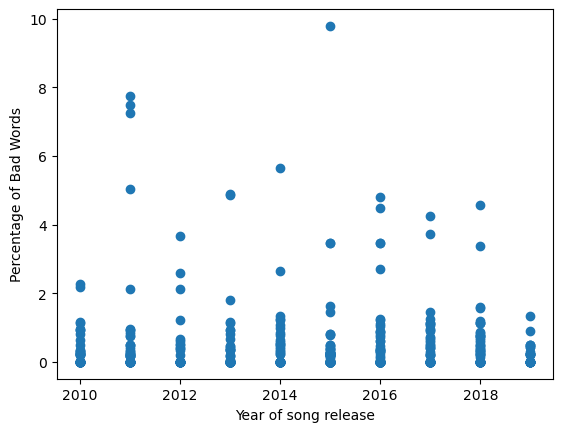

In [5]:
plt.scatter(joined_df.year, joined_df.perc_bad_words)
plt.ylabel('Percentage of Bad Words')
plt.xlabel('Year of song release')
plt.show()

In [6]:
X = joined_df.year.values.reshape(-1, 1)

# X = profanity_df.YearsExperience.values.reshape(-1, 1)
print(X)

[[2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2011]
 [2010]
 [2011]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2011]
 [2010]
 [2011]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2018]
 [2010]
 [2018]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2010]
 [2011]
 [2010]
 [2011]
 [2010]
 [2010]
 [2011]
 [2010]
 [2011]
 [2010]
 [2010]
 [2015]
 [2010]
 [2015]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2011]
 [2012]
 [2012]
 [2012]
 [2012]
 [2012]
 [2012]
 [2012]
 [2012]
 [2012]
 [2012]
 [2013]
 [2012]
 [2013]


In [7]:
y = joined_df.perc_bad_words
print(y)

0      0.000000
1      0.819672
2      0.215054
3      1.151631
4      0.308642
         ...   
607    0.235294
608    0.000000
609    0.000000
610    0.000000
611    0.487805
Name: perc_bad_words, Length: 612, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 0)

In [11]:
#fitting Simple Regression to training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
#predecting the test set results
y_pred = regressor.predict(X_test)
print(y_pred.shape)

(153,)


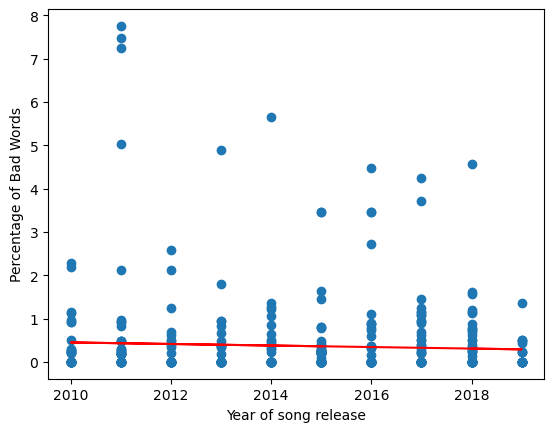

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Percentage of Bad Words')
plt.xlabel('Year of song release')
plt.show()

In [15]:
print(regressor.coef_)


[-0.01766001]


In [16]:
print(regressor.intercept_)

35.94590732200006
